# Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. Primary focus lies in analyzing the effectiveness of their marketing campaigns, which were predominantly conducted through phone calls. These campaigns were targeted at promoting the bank's term deposit products.

### Loading libraries and data

In [1]:
#Import necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import average_precision_score

In [2]:
#Upload the data
data = pd.read_csv('bank-additional-full.csv', sep=';')

## Data comprehension

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

El dataset comprises 41188 instances, 20 attributes and the target (y). Features are numeric and categorical. There isn't nulls values.

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#I discard the feature 'duration' given that it affects the model's performance.
data=data.drop(['duration'],axis=1)
data.shape

(41188, 20)

## EDA

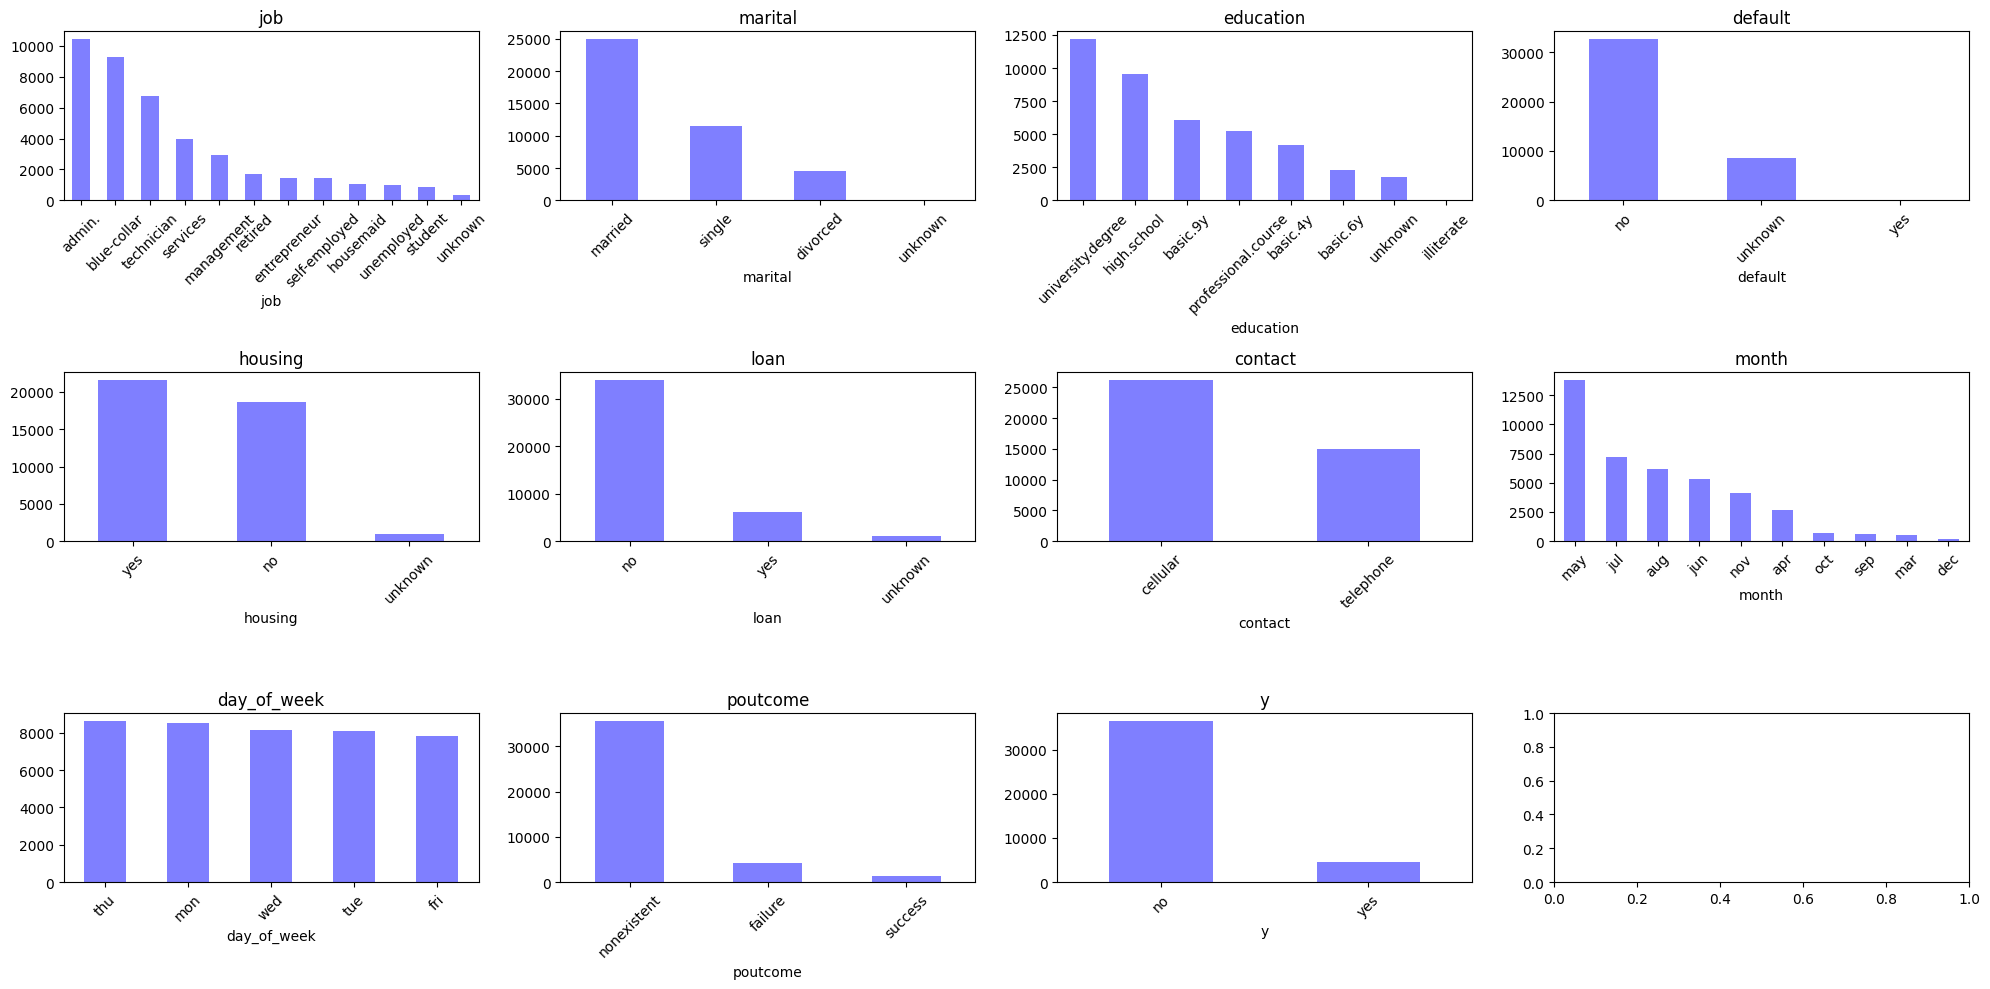

In [7]:
#I analyze the categorical features first.
cat_variables = data.select_dtypes(include=[object]).columns
ROWS, COLS = 3, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 10))
row, col = 0, 0
for i, feature in enumerate(cat_variables):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[feature].value_counts().plot(kind='bar', ax=ax[row, col], color='blue', alpha=0.5)
    ax[row, col].set_title(feature)
    plt.setp(ax[row, col].xaxis.get_majorticklabels(), rotation=45) # Rotar las etiquetas del eje x
fig.tight_layout()

We can observe that the predominant occupations of the clients are administrative, blue-collar, and technical. Married individuals and those with secondary - complete university education prevail. There are no individuals with default credits. The majority do not have a loan. Most contacts occurred in May. Most did not participate in previous campaigns (poutcome). Also, the majority rejected the term deposit (unbalanced target). 

It is observed that in the categories 'job', 'marital', 'education', 'default', 'housing', and 'loan' there are unknown data, 'unknown'. Since the data were collected from telephone interviews, it is possible that clients refused to provide their personal information.

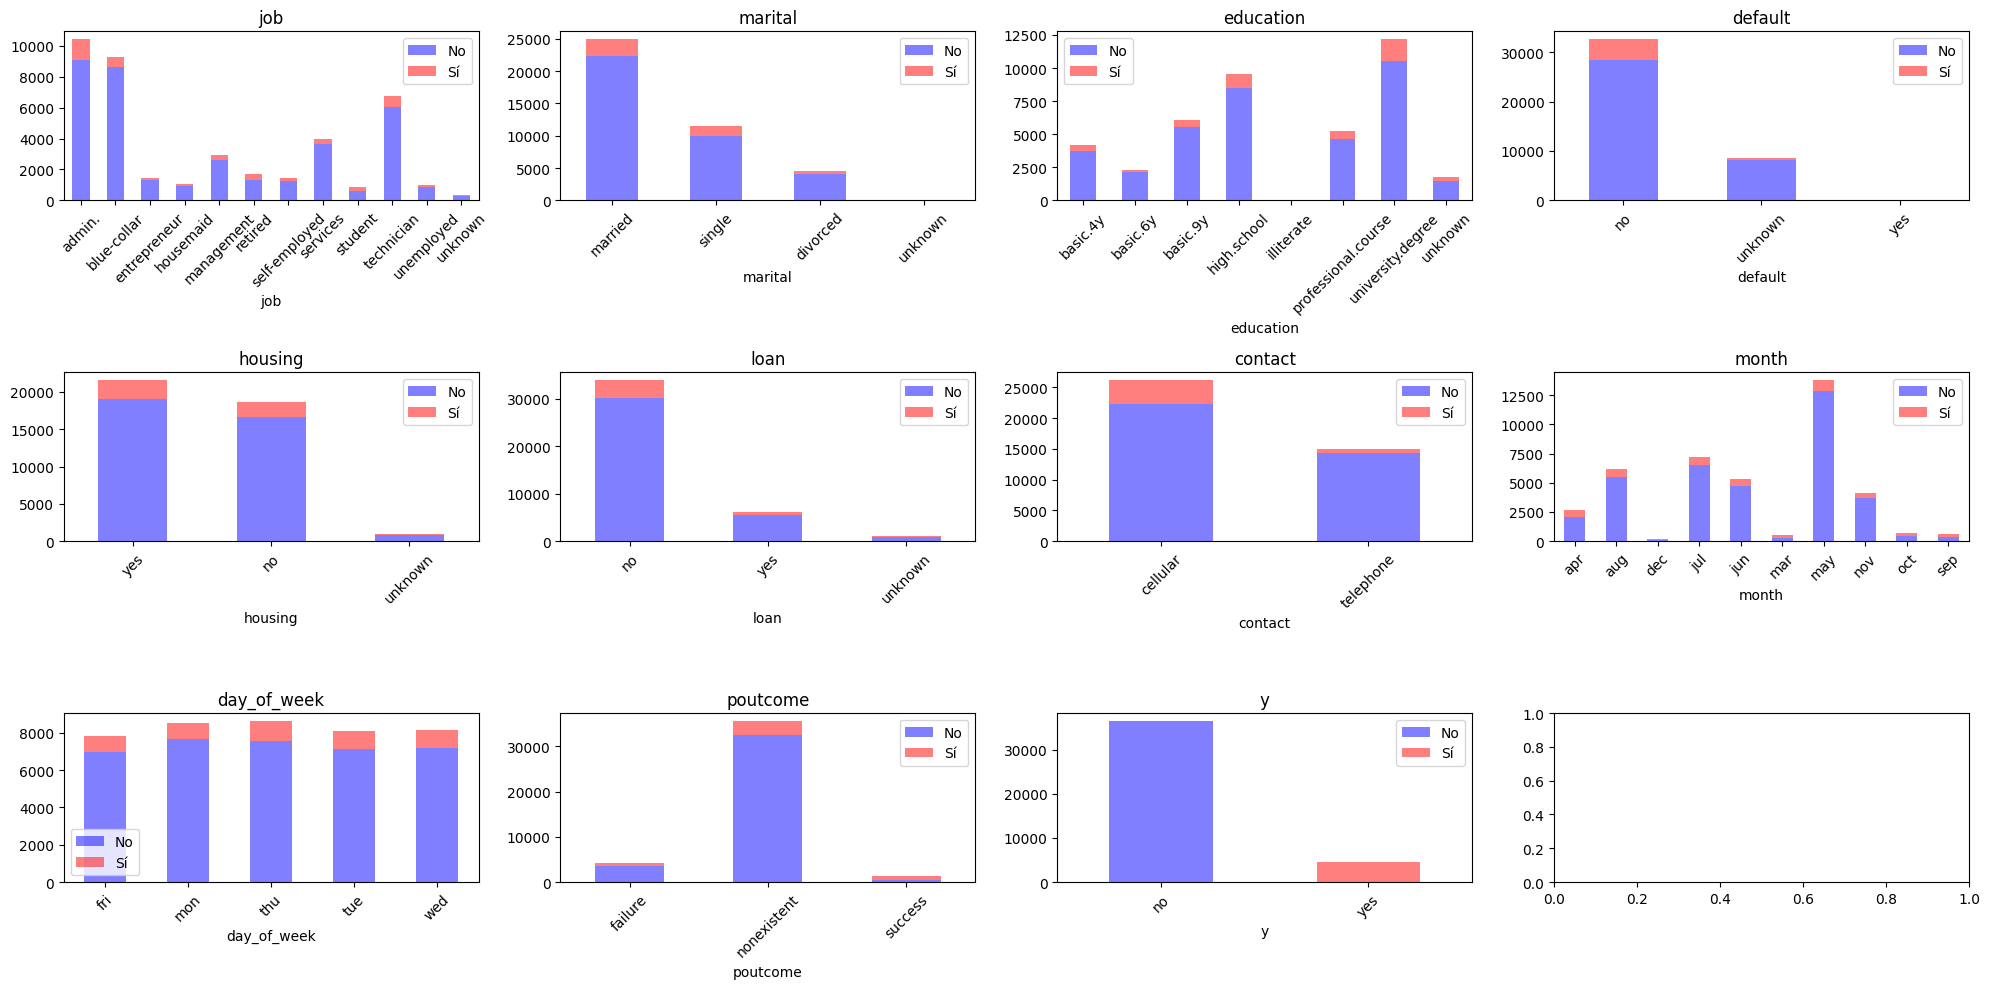

In [8]:
#Now I'll look at them again but separated by the target, to see if I find any pattern
ROWS, COLS = 3, 4
fig, axs = plt.subplots(ROWS, COLS, figsize=(20, 10))
axs = axs.ravel()

for i, feature in enumerate(cat_variables):
    # Calculate frequencies for each category
    freq_no = data[data['y'] == 'no'][feature].value_counts()
    freq_yes = data[data['y'] == 'yes'][feature].value_counts()

    # Create a DataFrame to facilitate plotting
    df_freq = pd.DataFrame({'No': freq_no, 'Sí': freq_yes})

    # Plot the stacked bar chart
    df_freq.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha=0.5, ax=axs[i])

    axs[i].set_title(feature)
    axs[i].legend()
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45) # Rote the tags in the x axis 

fig.tight_layout()

It can be observed that the proportion of singles who seem willing to put money in a term deposit appears to be higher compared to married individuals.

In [9]:
#Number of 'unknown' per column
for col in cat_variables:
  print(col, data[col].str.count('unknown').sum())

job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
poutcome 0
y 0


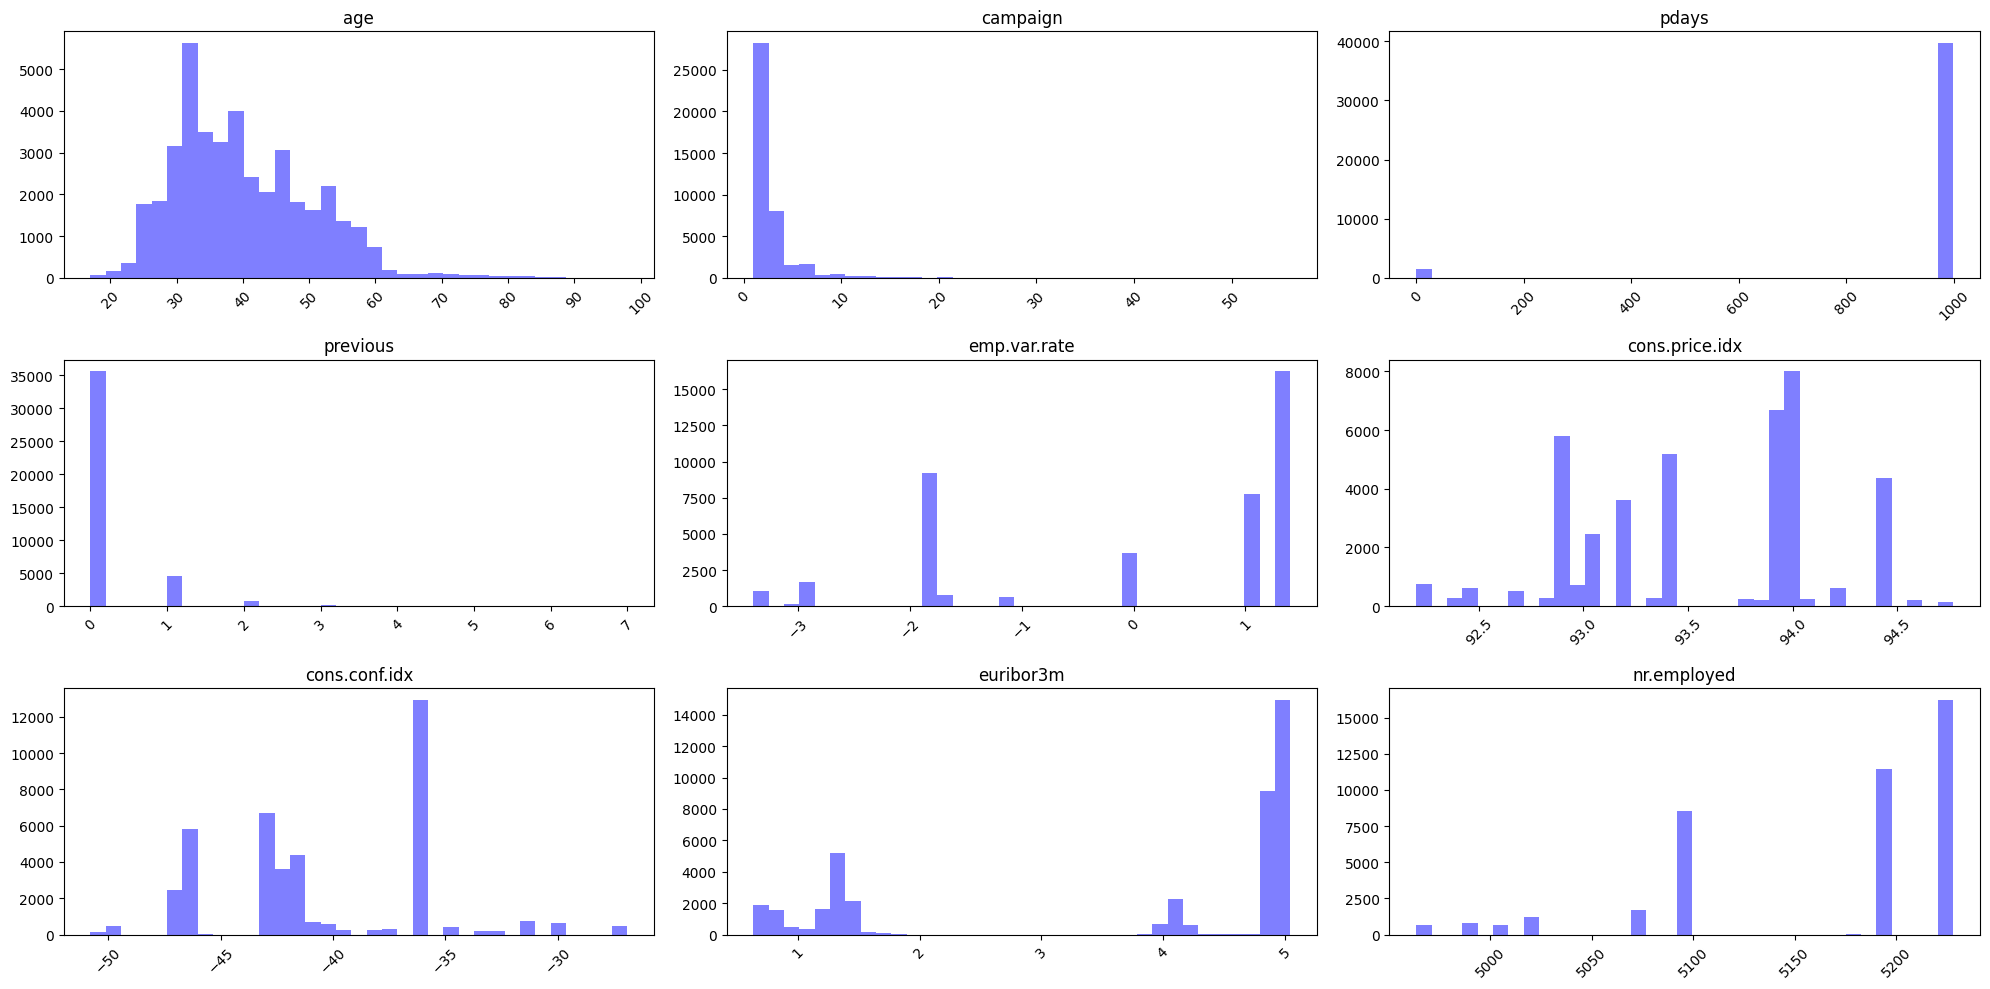

In [10]:
#Now I'll look at the numerical variables
num_variables = data.select_dtypes(include=[np.number]).columns
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(20,10))
row, col = 0, 0
for i, feature in enumerate(num_variables):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col])
    ax[row, col].set_title(feature)
    ax[row, col].tick_params(axis='x', rotation=45) # Rotar las etiquetas del eje x
    ax[row, col].grid(False) # Remover la grilla
fig.tight_layout()

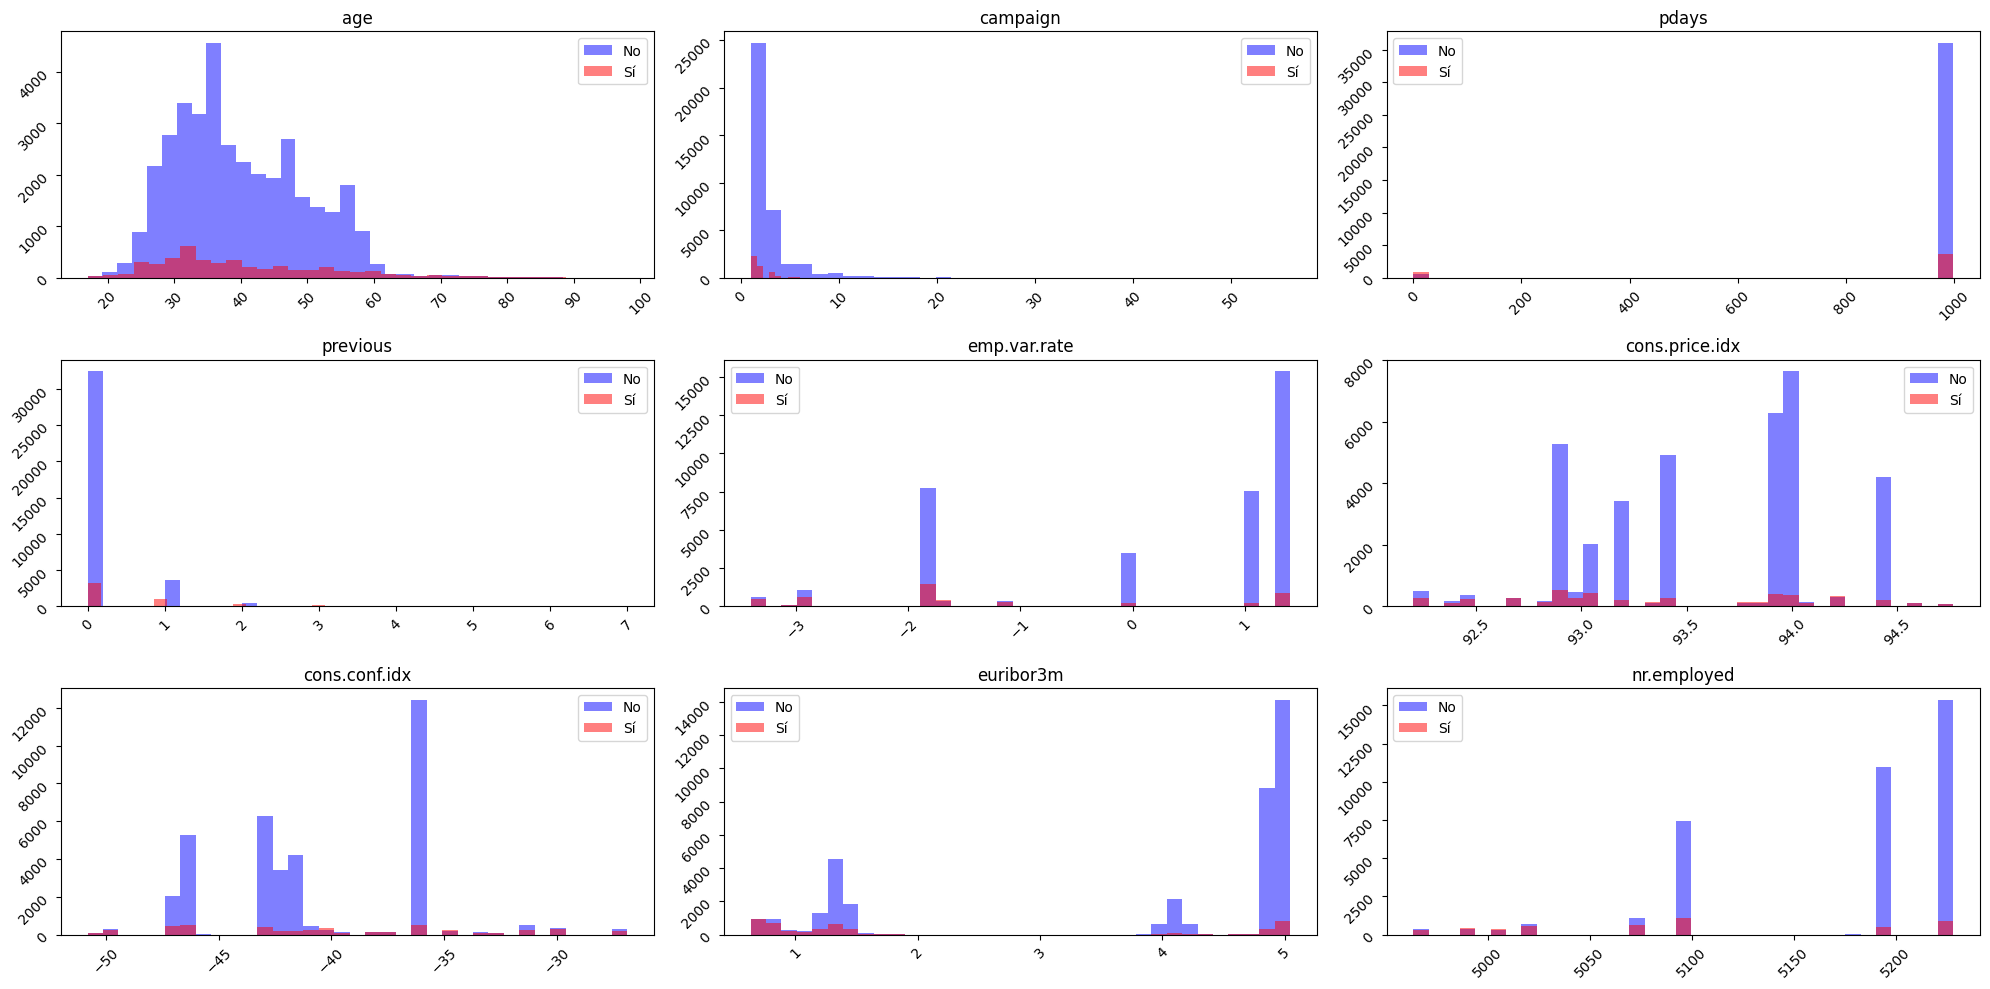

In [11]:
#Now I'll look at them again but separated by the target
ROWS, COLS = 3, 3
fig, axs = plt.subplots(ROWS, COLS, figsize=(20,10))
axs = axs.ravel()
row, col = 0, 0
for i, feature in enumerate(num_variables):
    axs[i].hist(data[data['y']=='no'][feature], bins=35, color='blue', alpha=0.5,label = "No")
    axs[i].hist(data[data['y']=='yes'][feature], bins=35, color='red', alpha=0.5, label = "Sí")
    axs[i].set_title(feature)
    axs[i].legend()
    axs[i].tick_params(labelrotation=45)
fig.tight_layout()

Looking at the graphs, I observe strange patterns, particularly in 'pdays'. In the case of pdays, '999' means that the client had not been previously contacted, which is consistent with what is observed in the graphs of 'previous', 'campaign', and 'poutcome'.

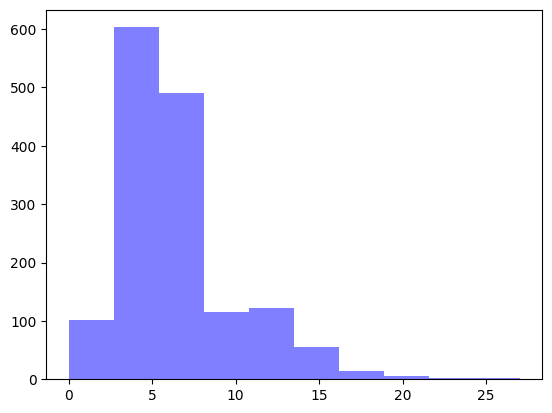

In [12]:
#I look at the pdays variable without the missing data
plt.hist(data.loc[data.pdays != 999, 'pdays'], bins=10, color='blue', alpha=0.5)
plt.show()

Most of the calls are made up to day 5, but then they continue until around day 30. To deal with this case, I am going to eliminate the numerical variable and replace it with boolean columns.

### Feature Engineering

In [13]:
data_mod = data.copy()
#I create the columns
data_mod['pdays_missing'] = 0
data_mod['pdays_5'] = 0
data_mod['pdays_30'] = 0
data_mod['pdays_more_30'] = 0

#Replace where applicable
data_mod.loc[data_mod['pdays']==999, 'pdays_missing'] = 1
data_mod.loc[data_mod['pdays']<=5, 'pdays_5'] = 1
data_mod.loc[(data_mod['pdays']>5) & (data_mod['pdays']<=30), 'pdays_30'] = 1
data_mod.loc[(data_mod['pdays'] > 30) & (data_mod['pdays']<=998), 'pdays_more_30'] = 1

#I delete the 'pdays' column
data_mod = data_mod.drop(['pdays'],axis=1)

In [14]:
data_mod.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_5,pdays_30,pdays_more_30
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0


In [15]:
# Remove 'pdays' fon numeric variables
num_variables = num_variables.drop('pdays')
# Add new columns
new_numeric_columns = ['pdays_missing', 'pdays_5', 'pdays_30', 'pdays_more_30']
num_variables = np.concatenate((num_variables, new_numeric_columns))

num_variables

array(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_missing',
       'pdays_5', 'pdays_30', 'pdays_more_30'], dtype=object)

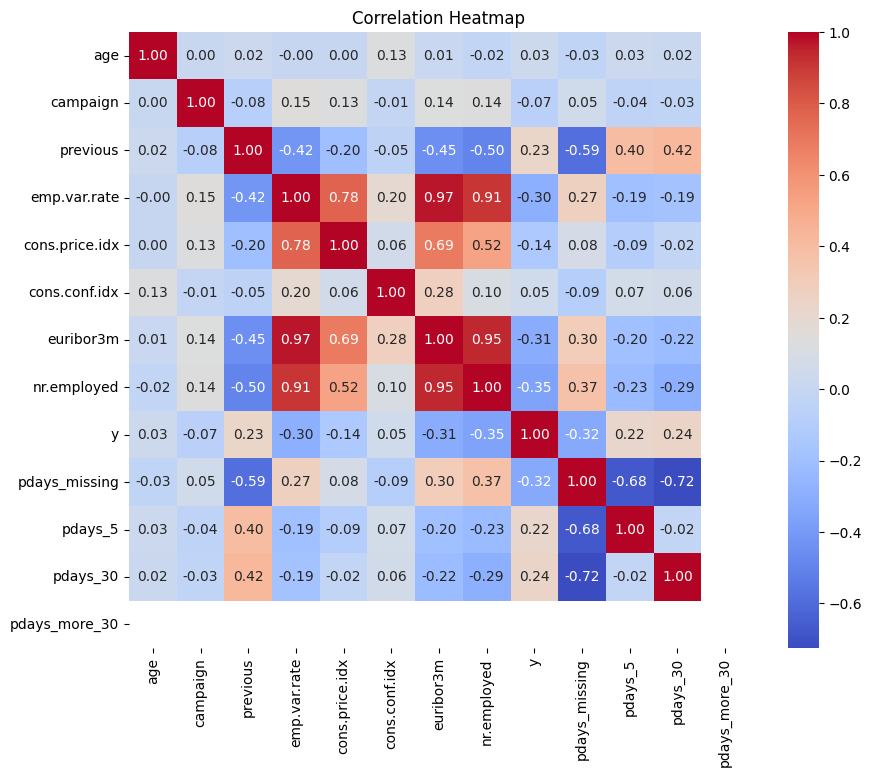

In [16]:
# Correlation Heatmap
#I'll transform target variable from 'yes' and 'no' to 1 and 0 to add it to the correlation matrix
data_mod['y'] = data['y'].map({'no': 0, 'yes': 1})

#I create the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_mod.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

It seems that emp.var.rate, euribor3m, and nr.employed have high positive correlations with each other. This could indicate multicollinearity, and affect the performance the model chosen (Logistic Regression).
From the heatmap, it appears that there are no extremely high correlations between the features and the target variable.

In [17]:
#I'll drop 'y' from the categorical variables
cat_variables = cat_variables.drop('y')

I'll drop emp.var.rate, euribor3m given prior knowledge of features importance.

In [18]:
data_mod = data_mod.drop(['emp.var.rate','euribor3m'], axis=1)


In [19]:
num_variables = [var for var in num_variables if var not in ['emp.var.rate', 'euribor3m']]
num_variables

['age',
 'campaign',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'pdays_missing',
 'pdays_5',
 'pdays_30',
 'pdays_more_30']

## Model

### Preprocessing

In [20]:

cols = data_mod.columns.values.tolist()
y=data_mod['y']
X = data_mod[[col for col in cols if col !="y"]]
X.shape ,y.shape

((41188, 20), (41188,))

In [21]:
#I separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (32950, 20)
y_train dataset:  (32950,)
X_test dataset:  (8238, 20)
y_test dataset:  (8238,)


In [22]:
#I create the pipelines
#I create the processing Pipes, one for numerical and another for categorical.

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

#I create the preprocessing Pipe, it applies the previous Pipes
preprocessor = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, num_variables),
    ('categorical_pipeline', categorical_pipeline, cat_variables)
])



### Model 1: Logistic Regression

In [ ]:
#I apply the processor and create an LR model. I'm going to use Lasso to drop less important features
lr = Pipeline([
    ('processor', preprocessor),
    ('lr', LogisticRegression(penalty='l1',solver= 'liblinear',max_iter=1000, random_state=42))
])

In [23]:
parameters =  [{
   'lr__C': np.linspace(0.1, 10, 10),
}]

clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=-1)
clf.fit(X_train, y_train.ravel())

#I look at the best parameters and performance on train
print("Best parameters found: ", clf.best_params_)
print("Best performance in train: ", clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV 5/5] END .........................lr__C=0.1;, score=0.903 total time=   0.5s
[CV 3/5] END .........................lr__C=0.1;, score=0.898 total time=   0.7s
[CV 1/5] END .........................lr__C=0.1;, score=0.903 total time=   0.7s
[CV 4/5] END .........................lr__C=0.1;, score=0.902 total time=   0.6s
[CV 2/5] END .........................lr__C=0.1;, score=0.898 total time=   0.7s
[CV 1/5] END ..........lr__C=2.3000000000000003;, score=0.904 total time=   3.2s
[CV 3/5] END ..........lr__C=2.3000000000000003;, score=0.897 total time=   3.2s
[CV 3/5] END ..........lr__C=1.2000000000000002;, score=0.897 total time=   4.4s
[CV 2/5] END ..........lr__C=1.2000000000000002;, score=0.898 total time=   4.8s
[CV 2/5] END ..........lr__C=2.3000000000000003;, score=0.898 total time=   4.2s
[CV 1/5] END ..........lr__C=1.2000000000000002;, score=0.904 total time=   5.3s
[CV 4/5] END ..........lr__C=1.2000000000000002;, score=0.901 total time=   4.8s
[CV 5/5] END ..........lr__C

In [24]:
#I look at the performance on train. Since the target is unbalanced, I'll look at F1 and average precision.
y_pred = clf.predict(X_train)
print("F1 score in train: ", f1_score(y_train, y_pred))
#I look at the confusion matrix
print(confusion_matrix(y_train, y_pred))
#I want to see the average precision of the model
print("Average precision in train: ", average_precision_score(y_train, y_pred))

F1 score in train:  0.34907926341072854
[[28826   419]
 [ 2833   872]]
Average precision in train:  0.24494997865938


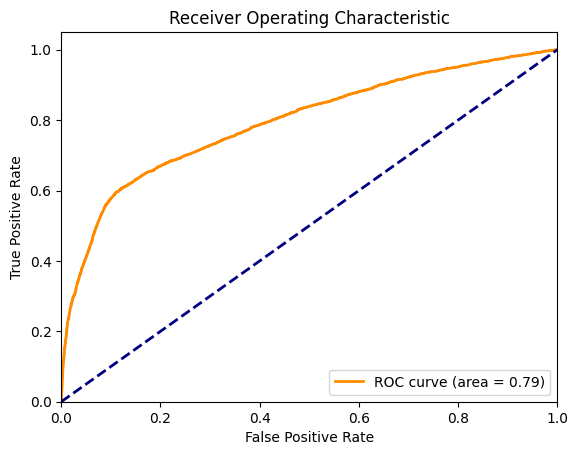

In [25]:
y_pred_prob = clf.predict_proba(X_train)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Compute AUC
auc = roc_auc_score(y_train, y_pred_prob)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The F1 and AP for training were ok, and the AUC seems to be good. It is possible that the class imbalance and the desire to predict the minority target (yes) are harming the performance, so I'm going to try with SMOTE (Synthetic Minority Over-sampling Technique).

In [26]:
lr_sm = imbPipeline([
   ('processor', preprocessor),
   ('smote', SMOTE(random_state=42)),
   ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

parameters =  [{
   'lr__C': np.linspace(1, 15, 10),
}]
clf2 = GridSearchCV(lr_sm, parameters, cv=5, verbose=5, n_jobs=-1)
clf2.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........................lr__C=1.0;, score=0.824 total time=   1.8s
[CV 4/5] END .........................lr__C=1.0;, score=0.821 total time=   1.7s
[CV 5/5] END .........................lr__C=1.0;, score=0.813 total time=   1.7s
[CV 3/5] END .........................lr__C=1.0;, score=0.813 total time=   1.8s
[CV 1/5] END ..........lr__C=2.5555555555555554;, score=0.824 total time=   1.8s
[CV 3/5] END ..........lr__C=2.5555555555555554;, score=0.813 total time=   1.9s
[CV 2/5] END ..........lr__C=2.5555555555555554;, score=0.816 total time=   1.9s
[CV 2/5] END .........................lr__C=1.0;, score=0.816 total time=   2.5s
[CV 5/5] END ..........lr__C=2.5555555555555554;, score=0.813 total time=   1.6s
[CV 2/5] END ...........lr__C=4.111111111111111;, score=0.816 total time=   1.8s
[CV 1/5] END ...........lr__C=4.111111111111111;, score=0.824 total time=   1.9s
[CV 3/5] END ...........lr__C=4.111111111111111;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'nr.employed',
                                                                          'pdays_missing',
                                                                          'pdays_5',
                                                                          'pdays_30',
                                                                          'pdays_more_30']),
                                                                        ('categorical_pipeline',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncod...
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid=[{'lr__C': array([ 1.        ,  2.55555556,  4.11111111,  5.66666667,  7.22222222,
        8.77777778, 10.33333333, 11.88888889, 13.44444444, 15.        ])}],
             verbose=5)

In [27]:
#I look at the best parameters and performance on train
print("Best parameters found: ", clf2.best_params_)
print("Best performance in train: ", clf2.best_score_)

#I look at the performance on train. As the target is unbalanced, I will look at F1 and average precision.
y_pred2 = clf2.predict(X_train)
print("F1 score: ", f1_score(y_train, y_pred2))
#Confusion matrix
print(confusion_matrix(y_train, y_pred2))
#Average precision
print("Average precision: ", average_precision_score(y_train, y_pred2))

Best parameters found:  {'lr__C': 11.88888888888889}
Best performance in train:  0.8176631259484066
F1 score:  0.4383026242322725
[[24559  4686]
 [ 1350  2355]]
Average precision:  0.25356921331816445


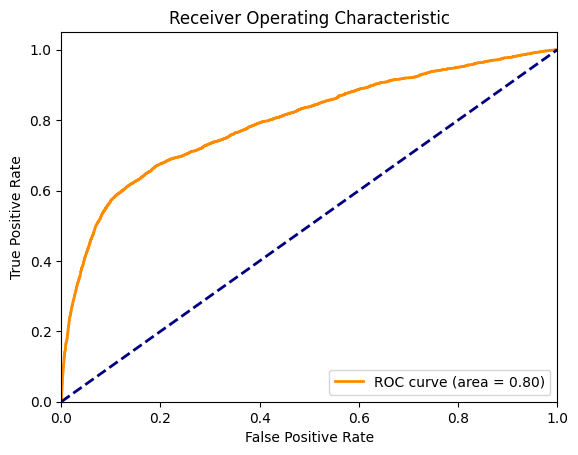

In [28]:
y_pred_prob = clf2.predict_proba(X_train)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Compute AUC
auc = roc_auc_score(y_train, y_pred_prob)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

F1 and average precision improved slightly, and ROC curve was stable. So, SMOTE helped to slightly improve the performance of the model in train set. Now I'll see what happends in test.

In [29]:
#I look at the performance on train. Since the target is unbalanced, I'll look at F1 and average precision.
y_pred_test = clf2.predict(X_test)
print("F1 score in test: ", f1_score(y_test, y_pred_test))
#I look at the confusion matrix
print(confusion_matrix(y_test, y_pred_test))
#I want to see the average precision of the model
print("Average precision in train: ", average_precision_score(y_test, y_pred_test))

F1 score in test:  0.42777571481619014
[[6121 1182]
 [ 359  576]]
Average precision in train:  0.2454219069166357


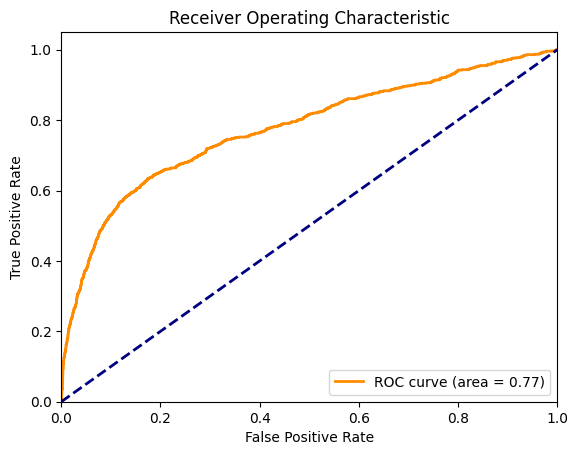

In [30]:
y_pred_prob_test = clf2.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_prob_test)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Results in test are a little lower than in train, which is good. Maybe the model chosen is too biased. So, I want too see what happends if a use a Random Forest intead of a Logistic Regression.

### Model 2: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

#I apply the processor and create an RF model
rf = Pipeline([
    ('processor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

In [32]:
parameters =  [{
   'rf__n_estimators': [5,10, 100],
   'rf__max_depth' : [6,7,8,10,20],
   'rf__criterion' :['gini', 'entropy']
}]

clf3 = GridSearchCV(rf, parameters, cv=5, verbose=5, n_jobs=-1)
clf3.fit(X_train, y_train.ravel())

#I look at the best parameters and performance on train
print("Best parameters found: ", clf3.best_params_)
print("Best performance in train: ", clf3.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[CV 2/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=5;, score=0.897 total time=   0.1s
[CV 1/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=5;, score=0.901 total time=   0.1s
[CV 3/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=5;, score=0.899 total time=   0.1s
[CV 4/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=5;, score=0.899 total time=   0.1s
[CV 5/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=5;, score=0.901 total time=   0.1s
[CV 1/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=10;, score=0.901 total time=   0.1s
[CV 3/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=10;, score=0.900 total time=   0.2s
[CV 2/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=10;, score=0.897 total time=   0.2s
[CV 4/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=10;, score=0.900 total time=   0.2s
[CV 5/5] END rf__criterion=gini, rf__max_depth=6, rf__n_estimators=10;, score=

/Users/floroppen/miniconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=10;, score=0.902 total time=   0.2s
[CV 2/5] END rf__criterion=gini, rf__max_depth=20, rf__n_estimators=500;, score=0.895 total time=  13.1s
[CV 3/5] END rf__criterion=gini, rf__max_depth=20, rf__n_estimators=500;, score=0.898 total time=  12.9s
[CV 2/5] END rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=10;, score=0.898 total time=   0.2s
[CV 4/5] END rf__criterion=gini, rf__max_depth=20, rf__n_estimators=500;, score=0.897 total time=  12.7s
[CV 4/5] END rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=10;, score=0.900 total time=   0.2s
[CV 5/5] END rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=10;, score=0.902 total time=   0.2s
[CV 5/5] END rf__criterion=gini, rf__max_depth=20, rf__n_estimators=500;, score=0.902 total time=  12.9s
[CV 3/5] END rf__criterion=entropy, rf__max_depth=7, rf__n_estimators=10;, score=0.900 total time=   0.2s
[CV 1/5] END rf__criterion=entropy, rf__max_depth=

In [33]:
#I look at the performance on train. As the target is unbalanced, I will look at F1 and average precision.
y_pred3 = clf3.predict(X_train)
print("F1 score: ", f1_score(y_train, y_pred3))
#Confusion matrix
print(confusion_matrix(y_train, y_pred3))
#Average precision
print("Average precision: ", average_precision_score(y_train, y_pred3))

F1 score:  0.39015384615384613
[[29026   219]
 [ 2754   951]]
Average precision:  0.2922160844731541


F1 and Avg Precision had similar scores than LG. Lets see what happends with ROC curve and AUC.

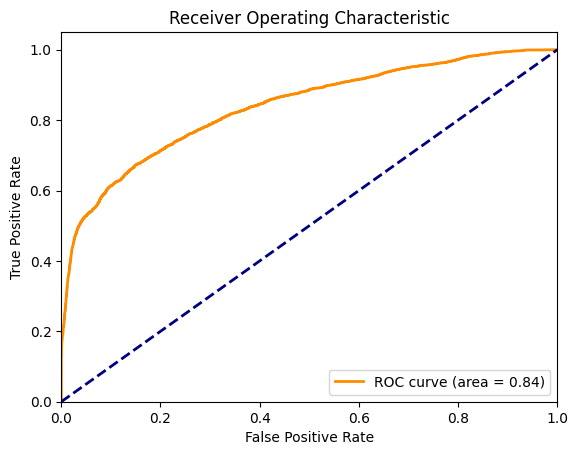

In [34]:
y_pred_prob = clf3.predict_proba(X_train)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Compute AUC
auc = roc_auc_score(y_train, y_pred_prob)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AUC seems to be a little better.

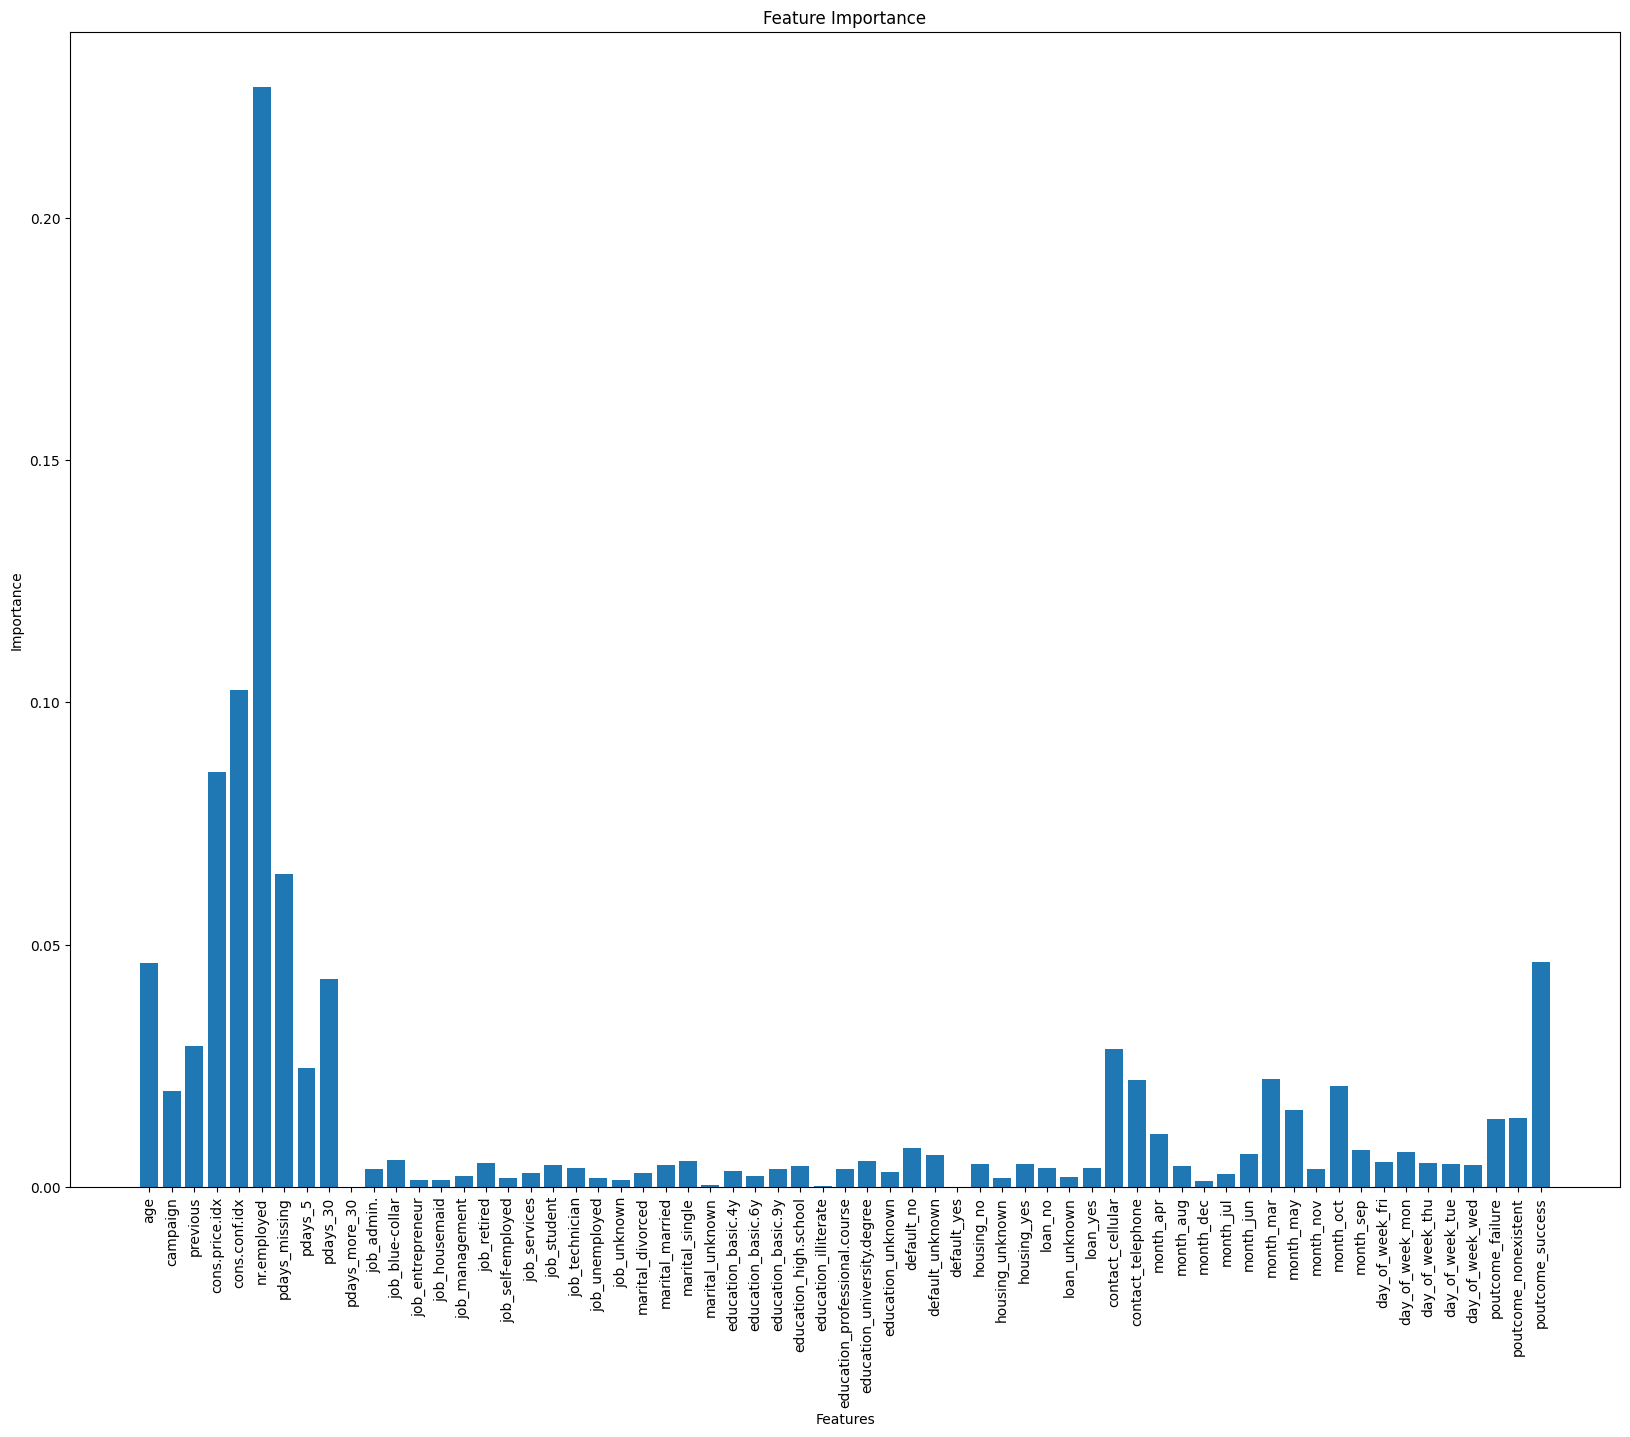

In [37]:
#Feature importance 
best_model = clf3.best_estimator_
rf_model = best_model.named_steps['rf']
feature_importance = rf_model.feature_importances_

#plot feature importance
# Step 1: Get transformed feature names from OneHotEncoder
ohe_feature_names = best_model.named_steps['processor'].named_transformers_['categorical_pipeline'].named_steps['encoder'].get_feature_names_out(cat_variables)

# Step 2: Combine with numerical feature names
all_feature_names = np.concatenate((num_variables, ohe_feature_names))

# Step 3: Plot the Feature Importances
plt.figure(figsize=(20, 15))
plt.bar(all_feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

Dominant Features: A small number of features have significantly higher importance scores compared to the others. The most important feature by a substantial margin appears to be 'nr.employed', 'cons.conf.idx' and 'cons.price.idx'. 'Age', 'pdays_missing' and 'poutcome_succes' seems to be relevant too.
Low Importance Features: Many features show very low importance. This could imply that they have little to no predictive power regarding the target variable in the context of this model. It might be worth considering if some of these features can be removed to simplify the model without sacrificing performance.
Business Insights: The features related to economic indicators and the previous outcome of the campaign (poutcome_success) are among the more important ones. This could provide business insights. More expert knowledge may be needed.

F1 score in test:  0.30456026058631924
[[7197  106]
 [ 748  187]]
Average precision in train:  0.2184437887521989


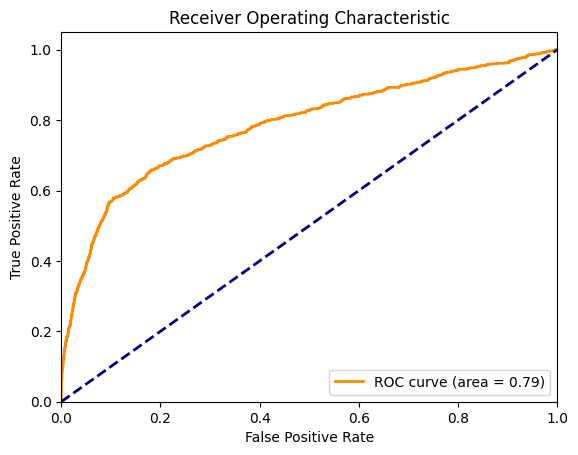

In [36]:
#I look at the performance on train. Since the target is unbalanced, I'll look at F1 and average precision.
y_pred_test = clf3.predict(X_test)
print("F1 score in test: ", f1_score(y_test, y_pred_test))
#I look at the confusion matrix
print(confusion_matrix(y_test, y_pred_test))
#I want to see the average precision of the model
print("Average precision in train: ", average_precision_score(y_test, y_pred_test))

y_pred_prob_test = clf3.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_prob_test)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In test, F1, Avg Precision and AUC were very similar than in LR. So, changing the model, even to one as powerful as the RF was not enough to improve the results. Two possible strategies to try to improve performance are to work on data engineering (using PCA for example) and feature extraction or by trying other unbalanced dataset strategies.